In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded1 = Dense(encoding_dim, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(784, activation='sigmoid')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



from keras.datasets import mnist, fashion_mnist
import numpy as np


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.7304 - val_loss: 0.7259
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - loss: 0.7245 - val_loss: 0.7201
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.7188 - val_loss: 0.7145
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.7132 - val_loss: 0.7091
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.7078 - val_loss: 0.7038
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 0.7025 - val_loss: 0.6987
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 0.6974 - val_loss: 0.6937
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 0.6924 - val_loss: 0.6888
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.6876 - val_loss: 0.6841
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.6829 - val_loss: 0.6795
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.6783 - val_loss: 0.6750
Epoch 12/20
235/235 ━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


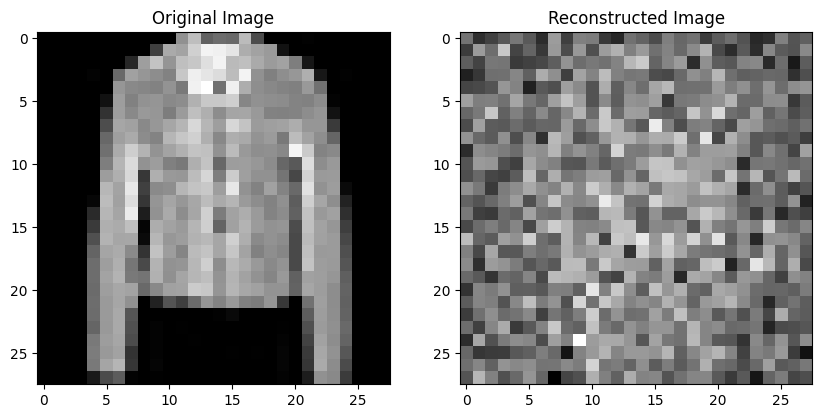

In [2]:
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize reconstructed image and original image
import matplotlib.pyplot as plt

# Choose an index of a test image to visualize
idx = 10

# Reshape the test image
test_img = x_test[idx].reshape(28, 28)

# Reshape the reconstructed image
reconstructed_img = decoded_imgs[idx].reshape(28, 28)

# Plot the original and reconstructed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


from keras.datasets import fashion_mnist
import numpy as np


(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history1 = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0018 - loss: 0.6985 - val_accuracy: 0.0010 - val_loss: 0.6984
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0016 - loss: 0.6982 - val_accuracy: 0.0010 - val_loss: 0.6981
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.0016 - loss: 0.6979 - val_accuracy: 0.0010 - val_loss: 0.6978
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.0017 - loss: 0.6976 - val_accuracy: 0.0010 - val_loss: 0.6975
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.0018 - loss: 0.6974 - val_accuracy: 0.0010 - val_loss: 0.6972
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0014 - loss: 0.6971 - val_accuracy: 0.0011 - val_loss: 0.6970
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.0016 - loss: 0.6968 - val_accuracy: 0.0011 - val_loss: 0.6967
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0018 - loss: 0.6966 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


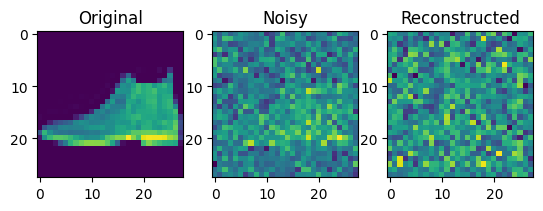

In [4]:
import matplotlib.pyplot as plt

# Get the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Select one image to display
img_to_display = 0

# Display the original, noisy, and reconstructed images side by side
plt.subplot(1, 3, 1)
plt.imshow(x_test[img_to_display].reshape(28, 28))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[img_to_display].reshape(28, 28))
plt.title('Noisy')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_imgs[img_to_display].reshape(28, 28))
plt.title('Reconstructed')

plt.show()


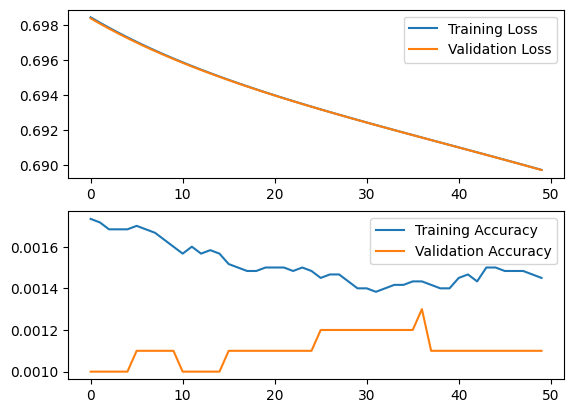

In [5]:
# Plot the loss and accuracy over epochs
plt.subplot(2, 1, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()